# Photoz correction

### calculate luminosities in IRAC and at 150MHz using photoz's

In [61]:
import numpy as np
from astropy.table import Table, hstack, join
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky, Distance
from IPython.display import clear_output
from scipy.optimize import curve_fit
import pickle
import os
import matplotlib.pyplot as plt
from pymoc import MOC
from utils import inMoc

In [2]:
photoz = Table.read('../dmu24/dmu24_Lockman-SWIRE/data/master_catalogue_Lockman-SWIRE_20170710_photoz_20170802_r_and_irac1_optimised.fits')

In [3]:
lockman_data = Table.read('data/merged_lofar_masterlist_lockman-swire.fits')

In [4]:
lockman_1_4_GHz = Table.read('../dmu13/dmu13-lockman-hole-project-1.4-ghz-cat-ids/data/dmu13-lockman-hole-1.4-ghz-cat.fits')

In [5]:
photoz_id = photoz['help_id']
lockman_id = lockman_data['help_id']

In [6]:
sel = np.in1d(lockman_id,photoz_id)
lockman_data = lockman_data[sel]

In [7]:
sel = np.in1d(photoz_id,lockman_id)
photoz_data = photoz[sel]

In [8]:
len(photoz_data)

16833

In [9]:
merged = hstack([lockman_data,photoz_data])

In [10]:
merged[0]

Source_id,Isl_id,RA_1,E_RA,DEC_1,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,lr_i,lr_dist_i,lr_index_i,lr_i_flux,lrt,help_id_1,field,ra,dec,hp_idx,f_ap_wfc_u,ferr_ap_wfc_u,m_ap_wfc_u,merr_ap_wfc_u,f_wfc_u,ferr_wfc_u,m_wfc_u,merr_wfc_u,flag_wfc_u,f_ap_wfc_g,ferr_ap_wfc_g,m_ap_wfc_g,merr_ap_wfc_g,f_wfc_g,ferr_wfc_g,m_wfc_g,merr_wfc_g,flag_wfc_g,f_ap_wfc_r,ferr_ap_wfc_r,m_ap_wfc_r,merr_ap_wfc_r,f_wfc_r,ferr_wfc_r,m_wfc_r,merr_wfc_r,flag_wfc_r,f_ap_wfc_i,ferr_ap_wfc_i,m_ap_wfc_i,merr_ap_wfc_i,f_wfc_i,ferr_wfc_i,m_wfc_i,merr_wfc_i,flag_wfc_i,f_ap_wfc_z,ferr_ap_wfc_z,m_ap_wfc_z,merr_ap_wfc_z,f_wfc_z,ferr_wfc_z,m_wfc_z,merr_wfc_z,flag_wfc_z,f_ap_rcs_g,ferr_ap_rcs_g,m_ap_rcs_g,merr_ap_rcs_g,f_rcs_g,ferr_rcs_g,m_rcs_g,merr_rcs_g,flag_rcs_g,f_ap_rcs_r,ferr_ap_rcs_r,m_ap_rcs_r,merr_ap_rcs_r,f_rcs_r,ferr_rcs_r,m_rcs_r,merr_rcs_r,flag_rcs_r,f_ap_rcs_i,ferr_ap_rcs_i,m_ap_rcs_i,merr_ap_rcs_i,f_rcs_i,ferr_rcs_i,m_rcs_i,merr_rcs_i,flag_rcs_i,f_ap_rcs_z,ferr_ap_rcs_z,m_ap_rcs_z,merr_ap_rcs_z,f_rcs_z,ferr_rcs_z,m_rcs_z,merr_rcs_z,flag_rcs_z,f_ap_rcs_y,ferr_ap_rcs_y,m_ap_rcs_y,merr_ap_rcs_y,f_rcs_y,ferr_rcs_y,m_rcs_y,merr_rcs_y,flag_rcs_y,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,flag_gpc1_y,f_ap_cfht_megacam_u,ferr_ap_cfht_megacam_u,m_ap_cfht_megacam_u,merr_ap_cfht_megacam_u,f_cfht_megacam_u,ferr_cfht_megacam_u,m_cfht_megacam_u,merr_cfht_megacam_u,flag_cfht_megacam_u,f_ap_cfht_megacam_g,ferr_ap_cfht_megacam_g,m_ap_cfht_megacam_g,merr_ap_cfht_megacam_g,f_cfht_megacam_g,ferr_cfht_megacam_g,m_cfht_megacam_g,merr_cfht_megacam_g,flag_cfht_megacam_g,f_ap_cfht_megacam_r,ferr_ap_cfht_megacam_r,m_ap_cfht_megacam_r,merr_ap_cfht_megacam_r,f_cfht_megacam_r,ferr_cfht_megacam_r,m_cfht_megacam_r,merr_cfht_megacam_r,flag_cfht_megacam_r,f_ap_cfht_megacam_z,ferr_ap_cfht_megacam_z,m_ap_cfht_megacam_z,merr_ap_cfht_megacam_z,f_cfht_megacam_z,ferr_cfht_megacam_z,m_cfht_megacam_z,merr_cfht_megacam_z,flag_cfht_megacam_z,f_ap_ukidss_j,ferr_ap_ukidss_j,m_ap_ukidss_j,merr_ap_ukidss_j,f_ukidss_j,ferr_ukidss_j,m_ukidss_j,merr_ukidss_j,flag_ukidss_j,f_ap_ukidss_k,ferr_ap_ukidss_k,m_ap_ukidss_k,merr_ap_ukidss_k,f_ukidss_k,ferr_ukidss_k,m_ukidss_k,merr_ukidss_k,flag_ukidss_k,f_ap_irac3,ferr_ap_irac3,m_ap_irac3,merr_ap_irac3,f_irac3,ferr_irac3,m_irac3,merr_irac3,flag_irac3,f_ap_irac4,ferr_ap_irac4,m_ap_irac4,merr_ap_irac4,f_irac4,ferr_irac4,m_irac4,merr_irac4,flag_irac4,f_ap_irac1,ferr_ap_irac1,m_ap_irac1,merr_ap_irac1,f_irac1,ferr_irac1,m_irac1,merr_irac1,flag_irac1,f_ap_irac2,ferr_ap_irac2,m_ap_irac2,merr_ap_irac2,f_irac2,ferr_irac2,m_irac2,merr_irac2,flag_irac2,stellarity,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,help_id_2,RA_2,DEC_2,id,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,za_hb,za_eazy,zm_eazy,zpeak_eazy,chi_r_eazy,l68_eazy,u68_eazy,nfilt_eazy,za_atlas,zm_atlas,zpeak_atlas,chi_r_atlas,l68_atlas,u68_atlas,nfilt_atlas,za_cosmos,zm_cosmos,zpeak_cosmos,chi_r_cosmos,l68_cosmos,u68_cosmos,nfilt_cosmos,chi_r_stellar,stellar_type
,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg

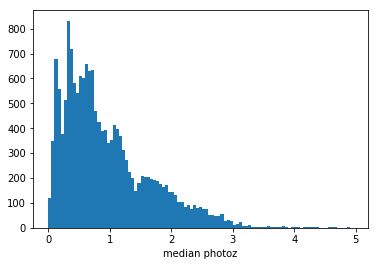

In [11]:
plt.hist(merged['z1_median'],bins=np.arange(0,5,0.05))
plt.xlabel('median photoz')
plt.show()

#### distance calculated by using the redshift relation for relativistic motion and alternatively using the distance module from astropy

In [12]:
c = 3*10**8
recession_vel = ((1+merged['z1_median'])**2 - 1)/((1+merged['z1_median'])**2 + 1) * c

In [13]:
H0 = 71.9
distance = recession_vel/H0

In [14]:
distance1 = Distance(z = merged['z1_median'])

/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/lib/function_base.py:2287: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/coordinates/distances.py:148: RuntimeWarning: invalid value encountered in less
  if not allow_negative and np.any(distance.value < 0):


In [15]:
distance1 = distance1.value*3.086*10**22

In [16]:
luminosity = (4*np.pi*distance**2) / ((1+merged['z1_median'])**(1-0.71)) * merged['Peak_flux']
luminosity1 = luminosity = (4*np.pi*distance1**2) / ((1+merged['z1_median'])**(1-0.71)) * merged['Peak_flux']

/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.
/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [17]:
luminosity_temp = []
for val in luminosity:
    if np.isnan(val) == True:
        val = 0.001
    luminosity_temp.append(val)
    
luminosity_temp1 = []
for val in luminosity1:
    if np.isnan(val) == True:
        val = 0.001
    luminosity_temp1.append(val)

In [18]:
luminosity_temp

[3.568376752309457e+49,
 9.206795530273462e+48,
 3.745174441674248e+47,
 4.862945259165948e+46,
 2.461495597387313e+49,
 3.847959863487289e+49,
 2.1659005188569674e+49,
 1.7501616411214564e+49,
 5.816887295395346e+49,
 1.1105752044990465e+49,
 2.2304145546257427e+49,
 2.1602198468392693e+49,
 4.363642369422322e+48,
 3.233955398949257e+49,
 8.537855343708697e+48,
 7.059757580006112e+49,
 1.7304358296596666e+49,
 2.2439778390112247e+50,
 1.4339563702908304e+49,
 6.620644577959588e+49,
 1.6355358588635491e+50,
 5.226897622348317e+50,
 1.079208658411041e+48,
 2.5685925340116435e+48,
 1.3063387244493647e+50,
 8.444305786779076e+50,
 1.7833015601213863e+48,
 9.778928789080698e+48,
 5.605729586672064e+50,
 3.847925645792667e+49,
 5.565525040497436e+49,
 1.9966558156481835e+49,
 2.243807824192805e+48,
 1.6147714687077785e+49,
 8.126172292404631e+48,
 1.8391842579343966e+49,
 4.8576094288863925e+48,
 2.850495990793421e+48,
 1.590339696258077e+50,
 8.18608991723504e+48,
 6.682597881585996e+48,
 

In [19]:
luminosity_temp = np.log10(luminosity_temp)
luminosity_temp1 = np.log10(luminosity_temp1)

#### as can be seen from the two following plots the distance calculated using the two different methods give very similar answers

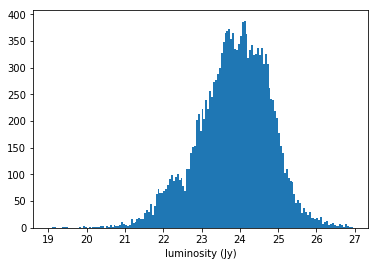

In [20]:
plt.hist(luminosity_temp-26,np.arange(19,27,0.05))
plt.xlabel('luminosity (Jy)')
plt.show()

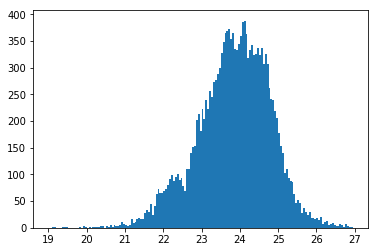

In [21]:
plt.hist(luminosity_temp1-26,np.arange(19,27,0.05))
plt.show()

(18, 27)

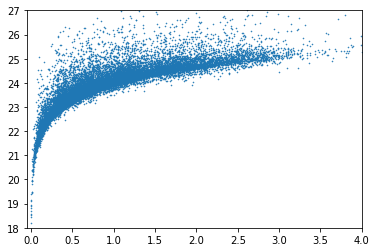

In [22]:
plt.scatter(merged['z1_median'],luminosity_temp1-26,s=0.3)
plt.xlim(-0.05,4)
plt.ylim(18,27)

In [23]:
len(lockman_1_4_GHz)

6377

In [48]:
lockman_RA = lockman_1_4_GHz['RA']
lockman_DEC = lockman_1_4_GHz['DEC']
print(lockman_DEC[0])
lockman_coord = SkyCoord(lockman_RA,lockman_DEC,unit=(u.hourangle,u.deg))

+58:31:27.2 


In [50]:
lockman_coord.ra

<Longitude [ 160.70383333, 160.72495833, 160.726125  ,...,  165.40620833,
             165.42433333, 165.42520833] deg>

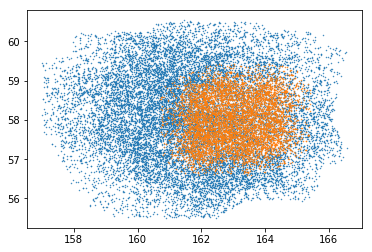

In [51]:
plt.scatter(merged['ra'],merged['dec'],s=0.2)
plt.scatter(lockman_coord.ra.value,lockman_coord.dec.value,s=0.2)
plt.show()

In [56]:
lockman_coord.ra.value.max()

165.42520833333333

In [57]:
(len(merged)/24) / (len(lockman_1_4_GHz)/((lockman_coord.ra.value.max()-lockman_coord.ra.value.min())*(lockman_coord.dec.value.max()-lockman_coord.dec.value.min())))

1.4790418642147842

In [58]:
((lockman_coord.ra.value.max()-lockman_coord.ra.value.min())*(lockman_coord.dec.value.max()-lockman_coord.dec.value.min()))

13.447656343750033

In [60]:
lockman_moc = MOC(filename='data/dmu13-lockman-hole-1_MOC.fits')

In [65]:
print(len(lockman_coord))
print(sum(inMoc(lockman_coord.ra,lockman_coord.dec,lockman_moc)))
print(sum(inMoc(merged['ra'],merged['dec'],lockman_moc)))

6377
6377
9046
